In [124]:
import numpy as np
import pandas as pd

In [125]:
data=pd.read_csv('mushrooms.csv')

In [126]:
print(data.shape)

(8124, 23)


In [127]:
data.head(5)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
le=LabelEncoder()

In [130]:
ds = data.apply(le.fit_transform)

In [131]:
ds.head(10)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [132]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
type                        8124 non-null int32
cap_shape                   8124 non-null int32
cap_surface                 8124 non-null int32
cap_color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill_attachment             8124 non-null int32
gill_spacing                8124 non-null int32
gill_size                   8124 non-null int32
gill_color                  8124 non-null int32
stalk_shape                 8124 non-null int32
stalk_root                  8124 non-null int32
stalk_surface_above_ring    8124 non-null int32
stalk_surface_below_ring    8124 non-null int32
stalk_color_above_ring      8124 non-null int32
stalk_color_below_ring      8124 non-null int32
veil_type                   8124 non-null int32
veil_color                  8124 non-null int32
ring_number                 8

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
data=(ds.values)
np.random.shuffle(data)
print(data)

[[0 5 0 ... 3 5 0]
 [1 5 0 ... 1 4 0]
 [1 3 2 ... 7 4 0]
 ...
 [0 5 0 ... 2 3 1]
 [0 5 0 ... 2 4 0]
 [0 5 3 ... 2 5 0]]


In [135]:
y_data=data[:,0]
x_data=data[:,1:]

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)

In [137]:
print(x_train.shape)

(7311, 22)


In [138]:
print(x_test.shape)

(813, 22)


### Applying Naive Bayes

In [139]:
def prior(y_train,label):
    return np.sum(y_train==label)/y_train.shape[0]

In [140]:
def cond_prob(x_train,y_train,feature_col,feature_val,label):
    splitted_x=x_train[y_train==label]
    num=np.sum(x_train[:,feature_col]==feature_val)
    den=splitted_x.shape[0]
    return num/den


In [141]:
def predict(x_train,y_train,test):
    classes=np.unique(y_train)
    n_features=x_train.shape[1]
    post_prob=[]
    
    for label in classes:
        lh=1.0    #Likelihood
        for f in range(n_features):
            cond=cond_prob(x_train,y_train,f,test[f],label)
            lh*=cond
        prior_=prior(y_train,label)
        posterior= lh*prior_
        post_prob.append(posterior)
        
    pred=np.argmax(post_prob)
    return pred

In [142]:
predict(x_train,y_train,x_test[1])

1

In [143]:
preds=[]
for i in range(x_test.shape[0]):
    preds.append(predict(x_train,y_train,x_test[i]))

In [144]:
ac=np.sum(preds==y_test)/y_test.shape[0]

In [145]:
print(ac)

0.48093480934809346


In [146]:
import matplotlib.pyplot as plt

In [147]:
%matplotlib notebook

<IPython.core.display.Javascript object>


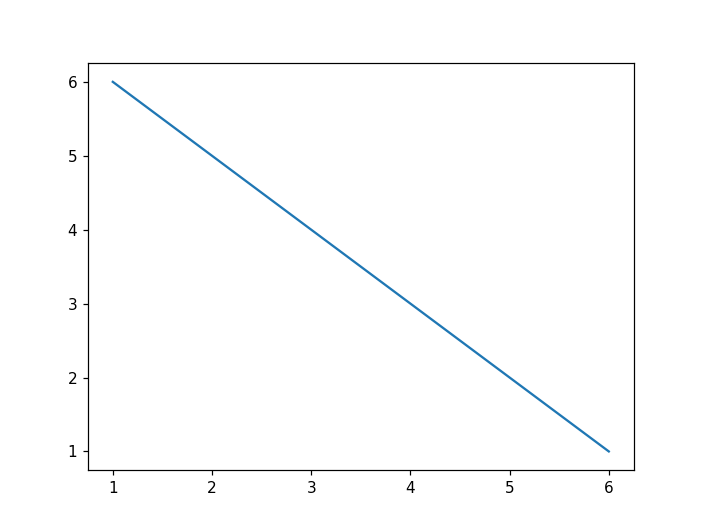

In [148]:
plt.plot([1,2,3,4,5,6],[6,5,4,3,2,1])
plt.show()

In [ ]:
from 